In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
churn_data = pd.read_csv('telecom_churn_clean.csv')

In [3]:
churn_data.shape

(3333, 20)

In [4]:
churn_data.isna().sum()

Unnamed: 0                0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [5]:
churn_data.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
#Creating arrays for the features and the target variables 
churn_data.columns 

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [7]:
churn_data = churn_data.drop(['area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_calls', 'total_eve_minutes', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls'], axis=1)

In [8]:
churn_data.columns

Index(['Unnamed: 0', 'account_length', 'total_day_charge', 'total_eve_charge',
       'total_night_charge', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [9]:
churn_data.shape

(3333, 8)

In [10]:
churn_features = churn_data[['account_length', 'customer_service_calls']].values
churn_target = churn_data['churn'].values

In [11]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(churn_features, churn_target)

KNeighborsClassifier(n_neighbors=6)

In [12]:
#initializing data points that will be used for prediction
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [13]:
y_pred = knn.predict(X_new)

In [14]:
y_pred

array([0, 1, 0], dtype=int64)

In [15]:
#Measuring model performance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(churn_features, churn_target, test_size=0.2, random_state=42, stratify=churn_target)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [16]:
#Measuring the score 
print(knn.score(X_test, y_test))

0.8515742128935532


In [17]:
#Testing our model with different neighbors(Model Complexity)
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.8627156789197299, 2: 0.8754688672168042, 3: 0.8735933983495874, 4: 0.8709677419354839, 5: 0.8717179294823706, 6: 0.8675918979744937, 7: 0.8687171792948237, 8: 0.86384096024006, 9: 0.8653413353338335, 10: 0.8634658664666166, 11: 0.86384096024006, 12: 0.8615903975993998} 
 {1: 0.7916041979010495, 2: 0.8575712143928036, 3: 0.8500749625187406, 4: 0.8590704647676162, 5: 0.8515742128935532, 6: 0.856071964017991, 7: 0.8500749625187406, 8: 0.8530734632683659, 9: 0.8590704647676162, 10: 0.8590704647676162, 11: 0.8605697151424287, 12: 0.856071964017991}


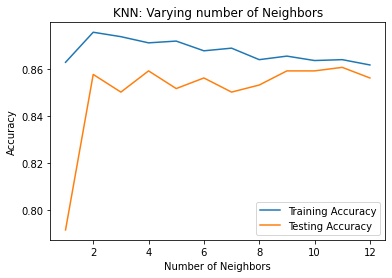

In [19]:
#Visualizing model Complexity
plt.title('KNN: Varying number of Neighbors')
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()